In [55]:
# import numpy as np
# np.version.version
!pip install numpy==1.19

  Using cached numpy-1.19.0.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Running from numpy source directory.
  <string>:460: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
  C:\Users\steve\AppData\Local\Temp\pip-install-1g24at8o\numpy_af19981db4e543feabe14fe466f366ad\tools\cythonize.py:73: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    required_version = LooseVersion('0.29.14')
  C:\Users\steve\AppData\Local\Temp\pip-install-1g24at8o\numpy_af19981db4e543feabe14fe466f366ad\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cython_version) < required_version:
  
  Error compiling Cython file:
  ------------------------------------------------------------
  ...
          for i in range(1, RK_STATE_LEN):
              

In [56]:
# https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures
import pandas as pd
import numpy as np
grains_df = pd.read_csv('all_grains_data.csv')
grains_df

,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...,...,...
34860,ZS=F,Soybean,2023-09-06,1365.50,1365.50,1359.50,1360.25,102
34861,ZS=F,Soybean,2023-09-07,1349.50,1350.00,1345.00,1345.00,310
34862,ZS=F,Soybean,2023-09-08,1339.00,1349.50,1339.00,1349.50,198
34863,ZS=F,Soybean,2023-09-11,1352.50,1352.50,1352.00,1352.50,36


In [57]:
grains_df['commodity'].unique()

array(['Corn', 'Oat', 'KC HRW Wheat', 'Rough Rice', 'Soybean Oil',
       'Soybean'], dtype=object)

In [58]:
corn_df = pd.read_csv('individual_data/Corn_data.csv')
corn_df

,date,open,high,low,close,volume
0,2000-07-17,182.25,182.25,178.25,179.25,19385
1,2000-07-18,179.00,183.25,179.00,180.75,25205
2,2000-07-19,180.00,182.75,178.75,182.00,17126
3,2000-07-20,181.50,187.00,181.00,186.00,18742
4,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...
5786,2023-09-06,473.50,476.25,471.25,471.50,841
5787,2023-09-07,471.25,474.00,468.50,470.75,741
5788,2023-09-08,471.25,472.25,467.00,468.50,233
5789,2023-09-11,470.25,471.50,468.00,471.25,430


In [59]:
corn_dict = {}
window_size = 7
for i in range(window_size):
    corn_dict['price_'+str(7-i)+'_days_ago'] = corn_df['close'][i:-7+i].reset_index(drop=True) 
corn_dict    

{'price_7_days_ago': 0       179.25
 1       180.75
 2       182.00
 3       186.00
 4       187.75
          ...  
 5779    470.75
 5780    478.50
 5781    469.50
 5782    461.75
 5783    461.00
 Name: close, Length: 5784, dtype: float64,
 'price_6_days_ago': 0       180.75
 1       182.00
 2       186.00
 3       187.75
 4       184.50
          ...  
 5779    478.50
 5780    469.50
 5781    461.75
 5782    461.00
 5783    464.75
 Name: close, Length: 5784, dtype: float64,
 'price_5_days_ago': 0       182.00
 1       186.00
 2       187.75
 3       184.50
 4       182.75
          ...  
 5779    469.50
 5780    461.75
 5781    461.00
 5782    464.75
 5783    471.00
 Name: close, Length: 5784, dtype: float64,
 'price_4_days_ago': 0       186.00
 1       187.75
 2       184.50
 3       182.75
 4       180.50
          ...  
 5779    461.75
 5780    461.00
 5781    464.75
 5782    471.00
 5783    471.50
 Name: close, Length: 5784, dtype: float64,
 'price_3_days_ago': 0       187.75
 1  

In [60]:
X = pd.DataFrame.from_dict(corn_dict)
X

,price_7_days_ago,price_6_days_ago,price_5_days_ago,price_4_days_ago,price_3_days_ago,price_2_days_ago,price_1_days_ago
0,179.25,180.75,182.00,186.00,187.75,184.50,182.75
1,180.75,182.00,186.00,187.75,184.50,182.75,180.50
2,182.00,186.00,187.75,184.50,182.75,180.50,181.00
3,186.00,187.75,184.50,182.75,180.50,181.00,180.25
4,187.75,184.50,182.75,180.50,181.00,180.25,180.25
...,...,...,...,...,...,...,...
5779,470.75,478.50,469.50,461.75,461.00,464.75,471.00
5780,478.50,469.50,461.75,461.00,464.75,471.00,471.50
5781,469.50,461.75,461.00,464.75,471.00,471.50,470.75
5782,461.75,461.00,464.75,471.00,471.50,470.75,468.50


In [61]:
y = corn_df['close'][7:].reset_index(drop=True) 
y

0       180.50
1       181.00
2       180.25
3       180.25
4       179.75
         ...  
5779    471.50
5780    470.75
5781    468.50
5782    471.25
5783    476.75
Name: close, Length: 5784, dtype: float64

In [62]:
train_pct = .9
X_train = X[:int(len(X)*train_pct)]
X_test = X[int(len(X)*train_pct):]
y_train = y[:int(len(y)*train_pct)]
y_test = y[int(len(y)*train_pct):]

In [63]:
from sklearn.linear_model import LinearRegression
  
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [64]:
print (classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))
# very high coefficient of determination on the train set, lower on the test set

0.9971498308553326
0.971229819095482


In [65]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(train_mse, test_mse)
# mse considerably higher on test set than train set
# higher in general than I would have thought. maybe I should compare these scores to a simple naive prediction using 
# the previous value.

65.14954633823858 193.58699139121558


In [66]:
y_train_pred

array([183.1865224 , 180.69614961, 181.4084901 , ..., 656.58183816,
       664.93181076, 658.73352565])

In [67]:
y_train

0       180.50
1       181.00
2       180.25
3       180.25
4       179.75
         ...  
5200    658.25
5201    658.25
5202    664.50
5203    659.50
5204    657.25
Name: close, Length: 5205, dtype: float64

In [68]:
X_train = X_train.to_numpy()

In [69]:
X_train

array([[179.25, 180.75, 182.  , ..., 187.75, 184.5 , 182.75],
       [180.75, 182.  , 186.  , ..., 184.5 , 182.75, 180.5 ],
       [182.  , 186.  , 187.75, ..., 182.75, 180.5 , 181.  ],
       ...,
       [759.5 , 757.5 , 719.  , ..., 652.5 , 658.25, 658.25],
       [757.5 , 719.  , 685.  , ..., 658.25, 658.25, 664.5 ],
       [719.  , 685.  , 652.5 , ..., 658.25, 664.5 , 659.5 ]])

In [70]:
X_test = X_test.to_numpy()


In [71]:
# Build the Model
import tensorflow as tf
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 7, 1)              0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 7, 64)            8704      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 lambda_3 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trai

In [72]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-12 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer)
#tf.keras.losses.Huber()
# Train the model
history = model_tune.fit(X_train, y_train, epochs=160, callbacks=[lr_schedule])

Epoch 1/160
163/163 [==============================] - 7s 10ms/step - loss: 231164.0625 - lr: 1.0000e-12
Epoch 2/160
163/163 [==============================] - 2s 10ms/step - loss: 231039.1562 - lr: 1.1220e-12
Epoch 3/160
163/163 [==============================] - 2s 10ms/step - loss: 230900.5469 - lr: 1.2589e-12
Epoch 4/160
163/163 [==============================] - 2s 10ms/step - loss: 230747.4844 - lr: 1.4125e-12
Epoch 5/160
163/163 [==============================] - 2s 10ms/step - loss: 230579.3906 - lr: 1.5849e-12
Epoch 6/160
163/163 [==============================] - 2s 9ms/step - loss: 230396.7500 - lr: 1.7783e-12
Epoch 7/160
163/163 [==============================] - 2s 10ms/step - loss: 230199.7500 - lr: 1.9953e-12
Epoch 8/160
163/163 [==============================] - 2s 10ms/step - loss: 229989.4844 - lr: 2.2387e-12
Epoch 9/160
163/163 [==============================] - 2s 10ms/step - loss: 229767.2344 - lr: 2.5119e-12
Epoch 10/160
163/163 [==============================] - 

163/163 [==============================] - 2s 10ms/step - loss: 22458.0664 - lr: 7.0795e-09
Epoch 79/160
163/163 [==============================] - 2s 10ms/step - loss: 22231.3359 - lr: 7.9433e-09
Epoch 80/160
163/163 [==============================] - 2s 10ms/step - loss: 22066.9180 - lr: 8.9125e-09
Epoch 81/160
163/163 [==============================] - 2s 9ms/step - loss: 21925.9629 - lr: 1.0000e-08
Epoch 82/160
163/163 [==============================] - 2s 9ms/step - loss: 21845.6250 - lr: 1.1220e-08
Epoch 83/160
163/163 [==============================] - 2s 9ms/step - loss: 21670.2598 - lr: 1.2589e-08
Epoch 84/160
163/163 [==============================] - 2s 9ms/step - loss: 21593.2324 - lr: 1.4125e-08
Epoch 85/160
163/163 [==============================] - 2s 9ms/step - loss: 21512.6250 - lr: 1.5849e-08
Epoch 86/160
163/163 [==============================] - 2s 9ms/step - loss: 21459.8145 - lr: 1.7783e-08
Epoch 87/160
163/163 [==============================] - 2s 9ms/step - loss

Epoch 156/160
163/163 [==============================] - 2s 10ms/step - loss: 23796.7070 - lr: 5.6234e-05
Epoch 157/160
163/163 [==============================] - 2s 11ms/step - loss: 26474.9121 - lr: 6.3096e-05
Epoch 158/160
163/163 [==============================] - 2s 10ms/step - loss: 24636.0723 - lr: 7.0795e-05
Epoch 159/160
163/163 [==============================] - 2s 11ms/step - loss: 25250.6133 - lr: 7.9433e-05
Epoch 160/160
163/163 [==============================] - 2s 10ms/step - loss: 31681.6699 - lr: 8.9125e-05


(1e-12, 0.0001, 0.0, 150000.0)

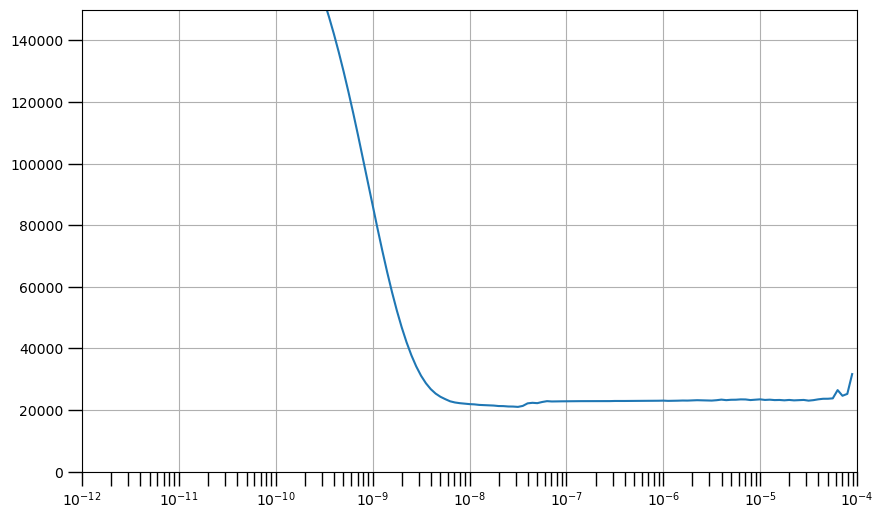

In [73]:
import matplotlib.pyplot as plt
# Define the learning rate array
lrs = 1e-12 * (10 ** (np.arange(160) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-12, 1e-4, 0, 150000])

In [74]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate based on the graph
learning_rate = 1e-9

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0)


# Set the training parameters
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=["mae"])

# loss=tf.keras.losses.Huber()

# Train the model
history = model.fit(X_train, y_train,epochs=5000)

Epoch 1/5000
163/163 [==============================] - 9s 18ms/step - loss: 121056.4453 - mae: 313.2603
Epoch 2/5000
163/163 [==============================] - 3s 18ms/step - loss: 91297.3203 - mae: 262.2705
Epoch 3/5000
163/163 [==============================] - 3s 18ms/step - loss: 76853.8594 - mae: 232.9790
Epoch 4/5000
163/163 [==============================] - 3s 18ms/step - loss: 65697.2578 - mae: 207.6284
Epoch 5/5000
163/163 [==============================] - 3s 19ms/step - loss: 56939.4531 - mae: 185.6296
Epoch 6/5000
163/163 [==============================] - 3s 20ms/step - loss: 50026.9805 - mae: 169.2836
Epoch 7/5000
163/163 [==============================] - 4s 25ms/step - loss: 44546.3867 - mae: 157.8373
Epoch 8/5000
163/163 [==============================] - 4s 23ms/step - loss: 40188.8672 - mae: 149.4710
Epoch 9/5000
163/163 [==============================] - 4s 24ms/step - loss: 36711.8516 - mae: 142.8074
Epoch 10/5000
163/163 [==============================] - 4s 24m

163/163 [==============================] - 4s 25ms/step - loss: 13463.5938 - mae: 83.4601
Epoch 80/5000
163/163 [==============================] - 4s 25ms/step - loss: 13382.2559 - mae: 83.0431
Epoch 81/5000
163/163 [==============================] - 4s 24ms/step - loss: 13405.5781 - mae: 83.5784
Epoch 82/5000
163/163 [==============================] - 4s 24ms/step - loss: 13312.8027 - mae: 83.1705
Epoch 83/5000
163/163 [==============================] - 4s 25ms/step - loss: 13056.6777 - mae: 81.9471
Epoch 84/5000
163/163 [==============================] - 4s 25ms/step - loss: 12952.0645 - mae: 81.3792
Epoch 85/5000
163/163 [==============================] - 4s 24ms/step - loss: 12895.0605 - mae: 81.5030
Epoch 86/5000
163/163 [==============================] - 4s 24ms/step - loss: 12799.0039 - mae: 81.2044
Epoch 87/5000
163/163 [==============================] - 4s 25ms/step - loss: 12662.1768 - mae: 80.5173
Epoch 88/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 25ms/step - loss: 7155.3530 - mae: 60.0393
Epoch 158/5000
163/163 [==============================] - 4s 25ms/step - loss: 7078.9888 - mae: 59.7930
Epoch 159/5000
163/163 [==============================] - 4s 24ms/step - loss: 6890.9355 - mae: 58.3169
Epoch 160/5000
163/163 [==============================] - 4s 24ms/step - loss: 6867.6304 - mae: 58.5159
Epoch 161/5000
163/163 [==============================] - 4s 25ms/step - loss: 6762.8657 - mae: 57.8442
Epoch 162/5000
163/163 [==============================] - 4s 25ms/step - loss: 6553.7114 - mae: 56.4435
Epoch 163/5000
163/163 [==============================] - 4s 24ms/step - loss: 6427.4033 - mae: 55.4692
Epoch 164/5000
163/163 [==============================] - 4s 24ms/step - loss: 6386.5273 - mae: 55.3041
Epoch 165/5000
163/163 [==============================] - 4s 25ms/step - loss: 6285.7788 - mae: 54.9396
Epoch 166/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 3544.5142 - mae: 42.1498
Epoch 236/5000
163/163 [==============================] - 4s 26ms/step - loss: 3607.9897 - mae: 42.1489
Epoch 237/5000
163/163 [==============================] - 4s 25ms/step - loss: 3579.9456 - mae: 42.5037
Epoch 238/5000
163/163 [==============================] - 4s 25ms/step - loss: 3491.0701 - mae: 42.1960
Epoch 239/5000
163/163 [==============================] - 4s 25ms/step - loss: 3465.0916 - mae: 41.4001
Epoch 240/5000
163/163 [==============================] - 4s 26ms/step - loss: 3439.0491 - mae: 41.8593
Epoch 241/5000
163/163 [==============================] - 4s 25ms/step - loss: 3504.0757 - mae: 41.6124
Epoch 242/5000
163/163 [==============================] - 4s 24ms/step - loss: 3362.1970 - mae: 40.6236
Epoch 243/5000
163/163 [==============================] - 4s 24ms/step - loss: 3381.3826 - mae: 40.9123
Epoch 244/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 25ms/step - loss: 2274.8574 - mae: 34.1321
Epoch 314/5000
163/163 [==============================] - 4s 24ms/step - loss: 2262.1914 - mae: 34.2469
Epoch 315/5000
163/163 [==============================] - 4s 24ms/step - loss: 2264.6807 - mae: 34.5380
Epoch 316/5000
163/163 [==============================] - 4s 24ms/step - loss: 2260.0239 - mae: 34.5899
Epoch 317/5000
163/163 [==============================] - 4s 25ms/step - loss: 2248.9666 - mae: 33.7852
Epoch 318/5000
163/163 [==============================] - 4s 24ms/step - loss: 2184.5557 - mae: 33.7878
Epoch 319/5000
163/163 [==============================] - 4s 24ms/step - loss: 2162.7844 - mae: 32.9819
Epoch 320/5000
163/163 [==============================] - 4s 24ms/step - loss: 2287.9285 - mae: 34.7559
Epoch 321/5000
163/163 [==============================] - 4s 25ms/step - loss: 2183.6814 - mae: 33.7792
Epoch 322/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 1657.4688 - mae: 29.9452
Epoch 392/5000
163/163 [==============================] - 4s 24ms/step - loss: 1547.3370 - mae: 28.8825
Epoch 393/5000
163/163 [==============================] - 4s 23ms/step - loss: 1673.2273 - mae: 29.6597
Epoch 394/5000
163/163 [==============================] - 4s 24ms/step - loss: 1629.1510 - mae: 29.9581
Epoch 395/5000
163/163 [==============================] - 4s 25ms/step - loss: 1605.6667 - mae: 29.6879
Epoch 396/5000
163/163 [==============================] - 4s 24ms/step - loss: 1561.6036 - mae: 28.1499
Epoch 397/5000
163/163 [==============================] - 4s 23ms/step - loss: 1532.9358 - mae: 28.5174
Epoch 398/5000
163/163 [==============================] - 4s 24ms/step - loss: 1633.2648 - mae: 30.0006
Epoch 399/5000
163/163 [==============================] - 4s 25ms/step - loss: 1473.6680 - mae: 27.6676
Epoch 400/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 1171.2870 - mae: 24.4706
Epoch 470/5000
163/163 [==============================] - 4s 23ms/step - loss: 1175.7631 - mae: 24.7445
Epoch 471/5000
163/163 [==============================] - 4s 23ms/step - loss: 1235.2954 - mae: 25.1431
Epoch 472/5000
163/163 [==============================] - 4s 24ms/step - loss: 1167.4990 - mae: 24.9211
Epoch 473/5000
163/163 [==============================] - 4s 24ms/step - loss: 1243.0814 - mae: 25.9344
Epoch 474/5000
163/163 [==============================] - 4s 24ms/step - loss: 1170.1454 - mae: 24.9298
Epoch 475/5000
163/163 [==============================] - 4s 23ms/step - loss: 1191.9867 - mae: 26.2296
Epoch 476/5000
163/163 [==============================] - 4s 24ms/step - loss: 1143.5677 - mae: 25.0399
Epoch 477/5000
163/163 [==============================] - 4s 25ms/step - loss: 1196.2883 - mae: 25.0182
Epoch 478/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 912.8671 - mae: 21.6546
Epoch 549/5000
163/163 [==============================] - 4s 24ms/step - loss: 968.3947 - mae: 22.5052
Epoch 550/5000
163/163 [==============================] - 4s 24ms/step - loss: 896.7003 - mae: 21.8859
Epoch 551/5000
163/163 [==============================] - 4s 24ms/step - loss: 940.9323 - mae: 22.0377
Epoch 552/5000
163/163 [==============================] - 4s 24ms/step - loss: 961.2820 - mae: 22.6784
Epoch 553/5000
163/163 [==============================] - 4s 23ms/step - loss: 842.6261 - mae: 21.0024
Epoch 554/5000
163/163 [==============================] - 4s 24ms/step - loss: 995.9944 - mae: 23.0878
Epoch 555/5000
163/163 [==============================] - 4s 25ms/step - loss: 867.6660 - mae: 21.4069
Epoch 556/5000
163/163 [==============================] - 4s 24ms/step - loss: 864.5825 - mae: 20.9862
Epoch 557/5000
163/163 [==============================] - 4s 23ms/step - loss: 885.4551 

163/163 [==============================] - 4s 24ms/step - loss: 746.1282 - mae: 19.4850
Epoch 628/5000
163/163 [==============================] - 4s 24ms/step - loss: 755.8951 - mae: 19.3805
Epoch 629/5000
163/163 [==============================] - 4s 24ms/step - loss: 625.8993 - mae: 17.5442
Epoch 630/5000
163/163 [==============================] - 4s 24ms/step - loss: 810.6886 - mae: 21.0494
Epoch 631/5000
163/163 [==============================] - 4s 23ms/step - loss: 779.7469 - mae: 19.8669
Epoch 632/5000
163/163 [==============================] - 4s 24ms/step - loss: 733.6418 - mae: 19.9341
Epoch 633/5000
163/163 [==============================] - 4s 24ms/step - loss: 841.3637 - mae: 21.2726
Epoch 634/5000
163/163 [==============================] - 4s 23ms/step - loss: 703.4257 - mae: 19.0778
Epoch 635/5000
163/163 [==============================] - 4s 23ms/step - loss: 691.2488 - mae: 17.8755
Epoch 636/5000
163/163 [==============================] - 4s 24ms/step - loss: 748.9156 

163/163 [==============================] - 4s 24ms/step - loss: 679.6711 - mae: 18.9830
Epoch 707/5000
163/163 [==============================] - 4s 24ms/step - loss: 622.6845 - mae: 17.5687
Epoch 708/5000
163/163 [==============================] - 4s 23ms/step - loss: 663.8508 - mae: 18.7034
Epoch 709/5000
163/163 [==============================] - 4s 23ms/step - loss: 643.9915 - mae: 18.2647
Epoch 710/5000
163/163 [==============================] - 4s 24ms/step - loss: 665.0867 - mae: 18.5923
Epoch 711/5000
163/163 [==============================] - 4s 24ms/step - loss: 621.8993 - mae: 17.8165
Epoch 712/5000
163/163 [==============================] - 4s 24ms/step - loss: 646.8882 - mae: 18.4885
Epoch 713/5000
163/163 [==============================] - 4s 23ms/step - loss: 684.0287 - mae: 19.0599
Epoch 714/5000
163/163 [==============================] - 4s 24ms/step - loss: 654.3626 - mae: 18.3040
Epoch 715/5000
163/163 [==============================] - 4s 24ms/step - loss: 651.2047 

163/163 [==============================] - 4s 24ms/step - loss: 602.0626 - mae: 17.4161
Epoch 786/5000
163/163 [==============================] - 4s 23ms/step - loss: 523.7855 - mae: 16.4824
Epoch 787/5000
163/163 [==============================] - 4s 23ms/step - loss: 605.2390 - mae: 17.7948
Epoch 788/5000
163/163 [==============================] - 4s 24ms/step - loss: 518.7561 - mae: 15.9667
Epoch 789/5000
163/163 [==============================] - 4s 24ms/step - loss: 631.5321 - mae: 17.8831
Epoch 790/5000
163/163 [==============================] - 4s 23ms/step - loss: 612.1123 - mae: 17.7555
Epoch 791/5000
163/163 [==============================] - 4s 23ms/step - loss: 566.2011 - mae: 17.1065
Epoch 792/5000
163/163 [==============================] - 4s 24ms/step - loss: 553.0069 - mae: 16.4685
Epoch 793/5000
163/163 [==============================] - 4s 24ms/step - loss: 542.6949 - mae: 16.6380
Epoch 794/5000
163/163 [==============================] - 4s 23ms/step - loss: 572.9154 

163/163 [==============================] - 4s 23ms/step - loss: 548.7977 - mae: 16.9228
Epoch 865/5000
163/163 [==============================] - 4s 24ms/step - loss: 520.5637 - mae: 16.2977
Epoch 866/5000
163/163 [==============================] - 4s 25ms/step - loss: 525.3360 - mae: 16.0050
Epoch 867/5000
163/163 [==============================] - 4s 24ms/step - loss: 494.4026 - mae: 15.7913
Epoch 868/5000
163/163 [==============================] - 4s 23ms/step - loss: 476.6296 - mae: 15.5366
Epoch 869/5000
163/163 [==============================] - 4s 23ms/step - loss: 515.3981 - mae: 16.1502
Epoch 870/5000
163/163 [==============================] - 4s 25ms/step - loss: 475.9032 - mae: 15.4550
Epoch 871/5000
163/163 [==============================] - 4s 24ms/step - loss: 529.9100 - mae: 16.0472
Epoch 872/5000
163/163 [==============================] - 4s 23ms/step - loss: 449.6460 - mae: 14.7639
Epoch 873/5000
163/163 [==============================] - 4s 23ms/step - loss: 526.3385 

163/163 [==============================] - 4s 23ms/step - loss: 464.7688 - mae: 15.0316
Epoch 944/5000
163/163 [==============================] - 4s 25ms/step - loss: 429.9434 - mae: 14.7598
Epoch 945/5000
163/163 [==============================] - 4s 24ms/step - loss: 543.2099 - mae: 16.5838
Epoch 946/5000
163/163 [==============================] - 4s 23ms/step - loss: 475.6104 - mae: 15.5576
Epoch 947/5000
163/163 [==============================] - 4s 23ms/step - loss: 458.7030 - mae: 15.0232
Epoch 948/5000
163/163 [==============================] - 4s 25ms/step - loss: 425.4231 - mae: 14.3764
Epoch 949/5000
163/163 [==============================] - 4s 24ms/step - loss: 482.4511 - mae: 15.0352
Epoch 950/5000
163/163 [==============================] - 4s 23ms/step - loss: 430.0916 - mae: 14.4542
Epoch 951/5000
163/163 [==============================] - 4s 24ms/step - loss: 459.0186 - mae: 15.2974
Epoch 952/5000
163/163 [==============================] - 4s 25ms/step - loss: 471.1812 

163/163 [==============================] - 4s 25ms/step - loss: 472.3892 - mae: 15.3922
Epoch 1023/5000
163/163 [==============================] - 4s 25ms/step - loss: 468.5237 - mae: 15.0000
Epoch 1024/5000
163/163 [==============================] - 4s 24ms/step - loss: 436.6157 - mae: 14.5222
Epoch 1025/5000
163/163 [==============================] - 4s 24ms/step - loss: 425.3991 - mae: 14.3430
Epoch 1026/5000
163/163 [==============================] - 4s 26ms/step - loss: 415.4608 - mae: 14.1668
Epoch 1027/5000
163/163 [==============================] - 4s 25ms/step - loss: 433.9215 - mae: 14.5303
Epoch 1028/5000
163/163 [==============================] - 4s 25ms/step - loss: 430.9966 - mae: 14.7837
Epoch 1029/5000
163/163 [==============================] - 4s 25ms/step - loss: 452.9786 - mae: 15.0454
Epoch 1030/5000
163/163 [==============================] - 4s 25ms/step - loss: 447.8838 - mae: 14.9702
Epoch 1031/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 25ms/step - loss: 453.8577 - mae: 14.9452
Epoch 1101/5000
163/163 [==============================] - 4s 24ms/step - loss: 417.4077 - mae: 14.2686
Epoch 1102/5000
163/163 [==============================] - 4s 23ms/step - loss: 439.0614 - mae: 14.8220
Epoch 1103/5000
163/163 [==============================] - 4s 24ms/step - loss: 396.5248 - mae: 14.0650
Epoch 1104/5000
163/163 [==============================] - 4s 24ms/step - loss: 411.7345 - mae: 14.2768
Epoch 1105/5000
163/163 [==============================] - 4s 23ms/step - loss: 439.2743 - mae: 14.5771
Epoch 1106/5000
163/163 [==============================] - 4s 24ms/step - loss: 440.6358 - mae: 14.5623
Epoch 1107/5000
163/163 [==============================] - 4s 24ms/step - loss: 434.1399 - mae: 14.6639
Epoch 1108/5000
163/163 [==============================] - 4s 25ms/step - loss: 402.0527 - mae: 13.9322
Epoch 1109/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 399.1470 - mae: 13.9988
Epoch 1179/5000
163/163 [==============================] - 4s 23ms/step - loss: 431.1311 - mae: 14.2037
Epoch 1180/5000
163/163 [==============================] - 4s 23ms/step - loss: 381.2869 - mae: 13.3748
Epoch 1181/5000
163/163 [==============================] - 4s 24ms/step - loss: 389.7405 - mae: 13.6381
Epoch 1182/5000
163/163 [==============================] - 4s 24ms/step - loss: 389.8174 - mae: 13.8011
Epoch 1183/5000
163/163 [==============================] - 4s 23ms/step - loss: 404.4273 - mae: 13.8900
Epoch 1184/5000
163/163 [==============================] - 4s 23ms/step - loss: 376.7267 - mae: 13.2219
Epoch 1185/5000
163/163 [==============================] - 4s 24ms/step - loss: 408.3074 - mae: 13.9089
Epoch 1186/5000
163/163 [==============================] - 4s 25ms/step - loss: 421.4079 - mae: 14.5861
Epoch 1187/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 363.0685 - mae: 13.3379
Epoch 1257/5000
163/163 [==============================] - 4s 24ms/step - loss: 407.8554 - mae: 14.2146
Epoch 1258/5000
163/163 [==============================] - 4s 23ms/step - loss: 346.0888 - mae: 12.7801
Epoch 1259/5000
163/163 [==============================] - 4s 24ms/step - loss: 380.5932 - mae: 13.0669
Epoch 1260/5000
163/163 [==============================] - 4s 24ms/step - loss: 344.4945 - mae: 12.8724
Epoch 1261/5000
163/163 [==============================] - 4s 23ms/step - loss: 412.2205 - mae: 14.2906
Epoch 1262/5000
163/163 [==============================] - 4s 24ms/step - loss: 386.7000 - mae: 13.5618
Epoch 1263/5000
163/163 [==============================] - 4s 24ms/step - loss: 396.8511 - mae: 14.0240
Epoch 1264/5000
163/163 [==============================] - 4s 24ms/step - loss: 340.5649 - mae: 12.6337
Epoch 1265/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 364.8107 - mae: 13.3013
Epoch 1335/5000
163/163 [==============================] - 4s 24ms/step - loss: 339.5252 - mae: 12.5530
Epoch 1336/5000
163/163 [==============================] - 4s 24ms/step - loss: 356.5894 - mae: 13.1660
Epoch 1337/5000
163/163 [==============================] - 4s 25ms/step - loss: 369.7193 - mae: 13.4523
Epoch 1338/5000
163/163 [==============================] - 4s 24ms/step - loss: 374.5951 - mae: 13.5398
Epoch 1339/5000
163/163 [==============================] - 4s 24ms/step - loss: 347.3936 - mae: 12.9301
Epoch 1340/5000
163/163 [==============================] - 4s 25ms/step - loss: 393.2666 - mae: 13.8469
Epoch 1341/5000
163/163 [==============================] - 4s 25ms/step - loss: 339.2492 - mae: 12.7450
Epoch 1342/5000
163/163 [==============================] - 4s 24ms/step - loss: 332.7778 - mae: 12.8181
Epoch 1343/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 366.0602 - mae: 13.1696
Epoch 1413/5000
163/163 [==============================] - 4s 24ms/step - loss: 351.2348 - mae: 13.1471
Epoch 1414/5000
163/163 [==============================] - 4s 25ms/step - loss: 351.6664 - mae: 12.8994
Epoch 1415/5000
163/163 [==============================] - 4s 24ms/step - loss: 328.9570 - mae: 12.7493
Epoch 1416/5000
163/163 [==============================] - 4s 24ms/step - loss: 317.1572 - mae: 12.2847
Epoch 1417/5000
163/163 [==============================] - 4s 24ms/step - loss: 341.7332 - mae: 12.8852
Epoch 1418/5000
163/163 [==============================] - 4s 25ms/step - loss: 353.0245 - mae: 12.9340
Epoch 1419/5000
163/163 [==============================] - 4s 24ms/step - loss: 359.4362 - mae: 13.1167
Epoch 1420/5000
163/163 [==============================] - 4s 24ms/step - loss: 361.8057 - mae: 13.2441
Epoch 1421/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 352.1705 - mae: 13.1583
Epoch 1491/5000
163/163 [==============================] - 4s 25ms/step - loss: 324.7814 - mae: 12.4099
Epoch 1492/5000
163/163 [==============================] - 4s 24ms/step - loss: 325.9043 - mae: 12.5067
Epoch 1493/5000
163/163 [==============================] - 4s 24ms/step - loss: 343.8715 - mae: 12.8067
Epoch 1494/5000
163/163 [==============================] - 4s 24ms/step - loss: 341.9422 - mae: 12.6963
Epoch 1495/5000
163/163 [==============================] - 4s 25ms/step - loss: 346.1750 - mae: 12.9506
Epoch 1496/5000
163/163 [==============================] - 4s 24ms/step - loss: 338.4861 - mae: 12.6210
Epoch 1497/5000
163/163 [==============================] - 4s 24ms/step - loss: 387.3706 - mae: 13.6896
Epoch 1498/5000
163/163 [==============================] - 4s 24ms/step - loss: 344.9969 - mae: 12.7586
Epoch 1499/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 25ms/step - loss: 340.3825 - mae: 12.7954
Epoch 1569/5000
163/163 [==============================] - 4s 24ms/step - loss: 322.8872 - mae: 12.1435
Epoch 1570/5000
163/163 [==============================] - 4s 24ms/step - loss: 308.3081 - mae: 12.0684
Epoch 1571/5000
163/163 [==============================] - 4s 24ms/step - loss: 364.1039 - mae: 13.3051
Epoch 1572/5000
163/163 [==============================] - 4s 25ms/step - loss: 312.1107 - mae: 12.2424
Epoch 1573/5000
163/163 [==============================] - 4s 24ms/step - loss: 328.6743 - mae: 12.5419
Epoch 1574/5000
163/163 [==============================] - 4s 24ms/step - loss: 347.9585 - mae: 12.8459
Epoch 1575/5000
163/163 [==============================] - 4s 24ms/step - loss: 322.2289 - mae: 12.3497
Epoch 1576/5000
163/163 [==============================] - 4s 25ms/step - loss: 350.9170 - mae: 12.8990
Epoch 1577/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 360.3155 - mae: 13.1830
Epoch 1647/5000
163/163 [==============================] - 4s 23ms/step - loss: 297.1339 - mae: 11.8695
Epoch 1648/5000
163/163 [==============================] - 4s 24ms/step - loss: 335.9406 - mae: 12.6413
Epoch 1649/5000
163/163 [==============================] - 4s 25ms/step - loss: 353.1092 - mae: 12.9604
Epoch 1650/5000
163/163 [==============================] - 4s 24ms/step - loss: 299.8195 - mae: 11.8285
Epoch 1651/5000
163/163 [==============================] - 4s 23ms/step - loss: 337.5130 - mae: 12.6465
Epoch 1652/5000
163/163 [==============================] - 4s 23ms/step - loss: 352.0861 - mae: 13.0003
Epoch 1653/5000
163/163 [==============================] - 4s 25ms/step - loss: 347.5652 - mae: 13.0386
Epoch 1654/5000
163/163 [==============================] - 4s 24ms/step - loss: 308.9719 - mae: 11.9978
Epoch 1655/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 309.3436 - mae: 12.1103
Epoch 1725/5000
163/163 [==============================] - 4s 23ms/step - loss: 345.2880 - mae: 12.8245
Epoch 1726/5000
163/163 [==============================] - 4s 24ms/step - loss: 303.4426 - mae: 11.9297
Epoch 1727/5000
163/163 [==============================] - 4s 25ms/step - loss: 309.0549 - mae: 12.0432
Epoch 1728/5000
163/163 [==============================] - 4s 23ms/step - loss: 359.1498 - mae: 13.3194
Epoch 1729/5000
163/163 [==============================] - 4s 24ms/step - loss: 315.6431 - mae: 12.0268
Epoch 1730/5000
163/163 [==============================] - 4s 23ms/step - loss: 293.4636 - mae: 11.7634
Epoch 1731/5000
163/163 [==============================] - 4s 25ms/step - loss: 321.9819 - mae: 12.1680
Epoch 1732/5000
163/163 [==============================] - 4s 24ms/step - loss: 337.5838 - mae: 12.8650
Epoch 1733/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 317.0681 - mae: 12.1767
Epoch 1803/5000
163/163 [==============================] - 4s 23ms/step - loss: 301.9626 - mae: 11.9348
Epoch 1804/5000
163/163 [==============================] - 4s 24ms/step - loss: 333.0558 - mae: 12.5387
Epoch 1805/5000
163/163 [==============================] - 4s 24ms/step - loss: 276.7511 - mae: 11.2314
Epoch 1806/5000
163/163 [==============================] - 4s 24ms/step - loss: 335.3029 - mae: 12.7662
Epoch 1807/5000
163/163 [==============================] - 4s 24ms/step - loss: 314.2255 - mae: 12.2287
Epoch 1808/5000
163/163 [==============================] - 4s 25ms/step - loss: 308.7418 - mae: 12.0751
Epoch 1809/5000
163/163 [==============================] - 4s 25ms/step - loss: 288.5565 - mae: 11.6523
Epoch 1810/5000
163/163 [==============================] - 4s 24ms/step - loss: 328.9999 - mae: 12.3344
Epoch 1811/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 313.2431 - mae: 12.0618
Epoch 1881/5000
163/163 [==============================] - 4s 24ms/step - loss: 314.6252 - mae: 12.2958
Epoch 1882/5000
163/163 [==============================] - 4s 25ms/step - loss: 276.5523 - mae: 11.4004
Epoch 1883/5000
163/163 [==============================] - 4s 25ms/step - loss: 352.0592 - mae: 12.5654
Epoch 1884/5000
163/163 [==============================] - 4s 25ms/step - loss: 307.4507 - mae: 12.0556
Epoch 1885/5000
163/163 [==============================] - 4s 24ms/step - loss: 287.4304 - mae: 11.7027
Epoch 1886/5000
163/163 [==============================] - 4s 25ms/step - loss: 333.5452 - mae: 12.6965
Epoch 1887/5000
163/163 [==============================] - 4s 24ms/step - loss: 304.9674 - mae: 11.9084
Epoch 1888/5000
163/163 [==============================] - 4s 23ms/step - loss: 304.7491 - mae: 11.9716
Epoch 1889/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 323.4833 - mae: 12.3252
Epoch 1959/5000
163/163 [==============================] - 4s 23ms/step - loss: 289.1410 - mae: 11.6349
Epoch 1960/5000
163/163 [==============================] - 4s 25ms/step - loss: 311.7058 - mae: 11.9398
Epoch 1961/5000
163/163 [==============================] - 4s 24ms/step - loss: 280.6669 - mae: 11.5305
Epoch 1962/5000
163/163 [==============================] - 4s 23ms/step - loss: 291.4768 - mae: 11.8359
Epoch 1963/5000
163/163 [==============================] - 4s 23ms/step - loss: 299.5407 - mae: 11.7639
Epoch 1964/5000
163/163 [==============================] - 4s 24ms/step - loss: 334.0642 - mae: 12.6084
Epoch 1965/5000
163/163 [==============================] - 4s 24ms/step - loss: 287.5834 - mae: 11.5299
Epoch 1966/5000
163/163 [==============================] - 4s 23ms/step - loss: 324.1033 - mae: 12.4584
Epoch 1967/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 281.3975 - mae: 11.4646
Epoch 2037/5000
163/163 [==============================] - 4s 23ms/step - loss: 288.2840 - mae: 11.6013
Epoch 2038/5000
163/163 [==============================] - 4s 24ms/step - loss: 339.0234 - mae: 12.7041
Epoch 2039/5000
163/163 [==============================] - 4s 24ms/step - loss: 285.6455 - mae: 11.5076
Epoch 2040/5000
163/163 [==============================] - 4s 23ms/step - loss: 319.6850 - mae: 12.2953
Epoch 2041/5000
163/163 [==============================] - 4s 23ms/step - loss: 296.1854 - mae: 11.6577
Epoch 2042/5000
163/163 [==============================] - 4s 24ms/step - loss: 313.5297 - mae: 12.0845
Epoch 2043/5000
163/163 [==============================] - 4s 24ms/step - loss: 303.9673 - mae: 11.9400
Epoch 2044/5000
163/163 [==============================] - 4s 23ms/step - loss: 287.8585 - mae: 11.5234
Epoch 2045/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 299.4668 - mae: 11.7919
Epoch 2115/5000
163/163 [==============================] - 4s 23ms/step - loss: 304.1892 - mae: 11.9855
Epoch 2116/5000
163/163 [==============================] - 4s 24ms/step - loss: 314.9105 - mae: 12.1161
Epoch 2117/5000
163/163 [==============================] - 4s 24ms/step - loss: 291.9370 - mae: 11.5535
Epoch 2118/5000
163/163 [==============================] - 4s 23ms/step - loss: 307.2705 - mae: 12.0952
Epoch 2119/5000
163/163 [==============================] - 4s 23ms/step - loss: 275.1429 - mae: 11.2738
Epoch 2120/5000
163/163 [==============================] - 4s 24ms/step - loss: 308.5329 - mae: 11.9384
Epoch 2121/5000
163/163 [==============================] - 4s 24ms/step - loss: 298.6183 - mae: 11.6452
Epoch 2122/5000
163/163 [==============================] - 4s 23ms/step - loss: 280.6835 - mae: 11.5621
Epoch 2123/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 303.4931 - mae: 12.0080
Epoch 2193/5000
163/163 [==============================] - 4s 23ms/step - loss: 297.8500 - mae: 11.8298
Epoch 2194/5000
163/163 [==============================] - 4s 23ms/step - loss: 298.9519 - mae: 11.8510
Epoch 2195/5000
163/163 [==============================] - 4s 24ms/step - loss: 303.1391 - mae: 12.0590
Epoch 2196/5000
163/163 [==============================] - 4s 23ms/step - loss: 311.0148 - mae: 12.0179
Epoch 2197/5000
163/163 [==============================] - 4s 23ms/step - loss: 293.1049 - mae: 11.8059
Epoch 2198/5000
163/163 [==============================] - 4s 23ms/step - loss: 276.2401 - mae: 11.2915
Epoch 2199/5000
163/163 [==============================] - 4s 24ms/step - loss: 293.9189 - mae: 11.7095
Epoch 2200/5000
163/163 [==============================] - 4s 24ms/step - loss: 292.1818 - mae: 11.4803
Epoch 2201/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 297.8304 - mae: 11.7868
Epoch 2271/5000
163/163 [==============================] - 4s 23ms/step - loss: 286.9218 - mae: 11.4548
Epoch 2272/5000
163/163 [==============================] - 4s 23ms/step - loss: 295.1804 - mae: 11.6303
Epoch 2273/5000
163/163 [==============================] - 4s 23ms/step - loss: 308.0586 - mae: 12.0303
Epoch 2274/5000
163/163 [==============================] - 4s 24ms/step - loss: 282.1423 - mae: 11.4585
Epoch 2275/5000
163/163 [==============================] - 4s 24ms/step - loss: 288.9266 - mae: 11.6067
Epoch 2276/5000
163/163 [==============================] - 4s 23ms/step - loss: 311.3465 - mae: 12.0695
Epoch 2277/5000
163/163 [==============================] - 4s 23ms/step - loss: 275.7086 - mae: 11.2091
Epoch 2278/5000
163/163 [==============================] - 4s 24ms/step - loss: 282.2509 - mae: 11.4449
Epoch 2279/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 290.9019 - mae: 11.6766
Epoch 2349/5000
163/163 [==============================] - 4s 23ms/step - loss: 300.5471 - mae: 11.7786
Epoch 2350/5000
163/163 [==============================] - 4s 23ms/step - loss: 296.5871 - mae: 11.6774
Epoch 2351/5000
163/163 [==============================] - 4s 23ms/step - loss: 289.3590 - mae: 11.6636
Epoch 2352/5000
163/163 [==============================] - 4s 24ms/step - loss: 302.8033 - mae: 11.8758
Epoch 2353/5000
163/163 [==============================] - 4s 24ms/step - loss: 287.2087 - mae: 11.3807
Epoch 2354/5000
163/163 [==============================] - 4s 23ms/step - loss: 277.6669 - mae: 11.2489
Epoch 2355/5000
163/163 [==============================] - 4s 23ms/step - loss: 280.3770 - mae: 11.4582
Epoch 2356/5000
163/163 [==============================] - 4s 24ms/step - loss: 294.3412 - mae: 11.6210
Epoch 2357/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 287.7179 - mae: 11.5107
Epoch 2427/5000
163/163 [==============================] - 4s 24ms/step - loss: 283.7076 - mae: 11.5352
Epoch 2428/5000
163/163 [==============================] - 4s 23ms/step - loss: 314.0464 - mae: 12.1112
Epoch 2429/5000
163/163 [==============================] - 4s 23ms/step - loss: 258.9149 - mae: 10.8644
Epoch 2430/5000
163/163 [==============================] - 4s 23ms/step - loss: 293.3817 - mae: 11.6505
Epoch 2431/5000
163/163 [==============================] - 4s 25ms/step - loss: 322.1779 - mae: 12.4351
Epoch 2432/5000
163/163 [==============================] - 4s 23ms/step - loss: 268.8878 - mae: 11.1100
Epoch 2433/5000
163/163 [==============================] - 4s 23ms/step - loss: 291.8531 - mae: 11.5658
Epoch 2434/5000
163/163 [==============================] - 4s 23ms/step - loss: 281.5148 - mae: 11.5329
Epoch 2435/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 270.9568 - mae: 11.3129
Epoch 2505/5000
163/163 [==============================] - 4s 24ms/step - loss: 295.6518 - mae: 11.4951
Epoch 2506/5000
163/163 [==============================] - 4s 24ms/step - loss: 257.6355 - mae: 10.8488
Epoch 2507/5000
163/163 [==============================] - 4s 23ms/step - loss: 281.0465 - mae: 11.6062
Epoch 2508/5000
163/163 [==============================] - 4s 23ms/step - loss: 317.7679 - mae: 11.7845
Epoch 2509/5000
163/163 [==============================] - 4s 24ms/step - loss: 292.7030 - mae: 11.5965
Epoch 2510/5000
163/163 [==============================] - 4s 24ms/step - loss: 296.4766 - mae: 11.8043
Epoch 2511/5000
163/163 [==============================] - 4s 23ms/step - loss: 246.2069 - mae: 10.5853
Epoch 2512/5000
163/163 [==============================] - 4s 23ms/step - loss: 297.9275 - mae: 11.8093
Epoch 2513/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 251.1228 - mae: 10.7950
Epoch 2583/5000
163/163 [==============================] - 4s 24ms/step - loss: 281.0740 - mae: 11.3480
Epoch 2584/5000
163/163 [==============================] - 4s 25ms/step - loss: 278.3051 - mae: 11.3108
Epoch 2585/5000
163/163 [==============================] - 4s 24ms/step - loss: 273.0390 - mae: 11.2168
Epoch 2586/5000
163/163 [==============================] - 4s 23ms/step - loss: 271.1478 - mae: 11.2149
Epoch 2587/5000
163/163 [==============================] - 4s 24ms/step - loss: 272.4407 - mae: 11.2939
Epoch 2588/5000
163/163 [==============================] - 4s 25ms/step - loss: 251.2999 - mae: 10.7155
Epoch 2589/5000
163/163 [==============================] - 4s 24ms/step - loss: 303.0056 - mae: 11.8936
Epoch 2590/5000
163/163 [==============================] - 4s 23ms/step - loss: 270.0559 - mae: 11.2729
Epoch 2591/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 258.7986 - mae: 10.7732
Epoch 2661/5000
163/163 [==============================] - 4s 24ms/step - loss: 288.2514 - mae: 11.6636
Epoch 2662/5000
163/163 [==============================] - 4s 25ms/step - loss: 268.6073 - mae: 10.9714
Epoch 2663/5000
163/163 [==============================] - 4s 23ms/step - loss: 297.0118 - mae: 11.7494
Epoch 2664/5000
163/163 [==============================] - 4s 23ms/step - loss: 280.3502 - mae: 11.3493
Epoch 2665/5000
163/163 [==============================] - 4s 23ms/step - loss: 278.8783 - mae: 11.2354
Epoch 2666/5000
163/163 [==============================] - 4s 25ms/step - loss: 307.9961 - mae: 11.9974
Epoch 2667/5000
163/163 [==============================] - 4s 24ms/step - loss: 277.0681 - mae: 11.3156
Epoch 2668/5000
163/163 [==============================] - 4s 23ms/step - loss: 252.2786 - mae: 10.8381
Epoch 2669/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 275.9778 - mae: 11.3417
Epoch 2739/5000
163/163 [==============================] - 4s 24ms/step - loss: 283.3224 - mae: 11.2883
Epoch 2740/5000
163/163 [==============================] - 4s 25ms/step - loss: 292.3860 - mae: 11.6901
Epoch 2741/5000
163/163 [==============================] - 4s 24ms/step - loss: 270.5522 - mae: 11.0991
Epoch 2742/5000
163/163 [==============================] - 4s 23ms/step - loss: 251.9891 - mae: 10.8733
Epoch 2743/5000
163/163 [==============================] - 4s 24ms/step - loss: 279.9043 - mae: 11.4072
Epoch 2744/5000
163/163 [==============================] - 4s 25ms/step - loss: 266.5489 - mae: 11.0622
Epoch 2745/5000
163/163 [==============================] - 4s 24ms/step - loss: 298.2330 - mae: 11.7098
Epoch 2746/5000
163/163 [==============================] - 4s 24ms/step - loss: 271.2629 - mae: 11.2063
Epoch 2747/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 270.6395 - mae: 11.1867
Epoch 2817/5000
163/163 [==============================] - 4s 25ms/step - loss: 302.2039 - mae: 11.9354
Epoch 2818/5000
163/163 [==============================] - 4s 25ms/step - loss: 251.2845 - mae: 10.7219
Epoch 2819/5000
163/163 [==============================] - 4s 24ms/step - loss: 291.0258 - mae: 11.6404
Epoch 2820/5000
163/163 [==============================] - 4s 24ms/step - loss: 283.5556 - mae: 11.4830
Epoch 2821/5000
163/163 [==============================] - 4s 25ms/step - loss: 285.2462 - mae: 11.5476
Epoch 2822/5000
163/163 [==============================] - 4s 25ms/step - loss: 288.5747 - mae: 11.4502
Epoch 2823/5000
163/163 [==============================] - 4s 24ms/step - loss: 272.7619 - mae: 11.3002
Epoch 2824/5000
163/163 [==============================] - 4s 23ms/step - loss: 272.7412 - mae: 11.0789
Epoch 2825/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 25ms/step - loss: 251.4320 - mae: 10.7007
Epoch 2895/5000
163/163 [==============================] - 4s 25ms/step - loss: 281.4046 - mae: 11.4996
Epoch 2896/5000
163/163 [==============================] - 4s 24ms/step - loss: 279.5280 - mae: 11.2672
Epoch 2897/5000
163/163 [==============================] - 4s 23ms/step - loss: 280.5739 - mae: 11.2039
Epoch 2898/5000
163/163 [==============================] - 4s 23ms/step - loss: 257.8723 - mae: 10.8989
Epoch 2899/5000
163/163 [==============================] - 4s 24ms/step - loss: 274.2904 - mae: 11.2403
Epoch 2900/5000
163/163 [==============================] - 4s 24ms/step - loss: 267.8076 - mae: 11.0901
Epoch 2901/5000
163/163 [==============================] - 4s 24ms/step - loss: 304.2027 - mae: 11.7848
Epoch 2902/5000
163/163 [==============================] - 4s 23ms/step - loss: 273.1808 - mae: 11.0653
Epoch 2903/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 249.7528 - mae: 10.6427
Epoch 2973/5000
163/163 [==============================] - 4s 24ms/step - loss: 273.1648 - mae: 11.1121
Epoch 2974/5000
163/163 [==============================] - 4s 25ms/step - loss: 280.6946 - mae: 11.4078
Epoch 2975/5000
163/163 [==============================] - 4s 23ms/step - loss: 264.8905 - mae: 11.0233
Epoch 2976/5000
163/163 [==============================] - 4s 23ms/step - loss: 280.2291 - mae: 11.4404
Epoch 2977/5000
163/163 [==============================] - 4s 24ms/step - loss: 258.1076 - mae: 10.9529
Epoch 2978/5000
163/163 [==============================] - 4s 24ms/step - loss: 270.3402 - mae: 11.1233
Epoch 2979/5000
163/163 [==============================] - 4s 24ms/step - loss: 261.0048 - mae: 10.9572
Epoch 2980/5000
163/163 [==============================] - 4s 23ms/step - loss: 276.8322 - mae: 11.2002
Epoch 2981/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 267.8734 - mae: 11.1886
Epoch 3051/5000
163/163 [==============================] - 4s 24ms/step - loss: 287.2524 - mae: 11.6476
Epoch 3052/5000
163/163 [==============================] - 4s 24ms/step - loss: 266.5959 - mae: 11.0619
Epoch 3053/5000
163/163 [==============================] - 4s 23ms/step - loss: 265.7342 - mae: 10.8623
Epoch 3054/5000
163/163 [==============================] - 4s 24ms/step - loss: 254.0088 - mae: 10.7540
Epoch 3055/5000
163/163 [==============================] - 4s 24ms/step - loss: 261.3384 - mae: 11.0620
Epoch 3056/5000
163/163 [==============================] - 4s 24ms/step - loss: 270.0212 - mae: 11.0999
Epoch 3057/5000
163/163 [==============================] - 4s 23ms/step - loss: 268.4992 - mae: 11.1186
Epoch 3058/5000
163/163 [==============================] - 4s 23ms/step - loss: 259.2498 - mae: 10.7949
Epoch 3059/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 262.6993 - mae: 11.0085
Epoch 3129/5000
163/163 [==============================] - 4s 25ms/step - loss: 245.6767 - mae: 10.5765
Epoch 3130/5000
163/163 [==============================] - 4s 24ms/step - loss: 264.1842 - mae: 11.0784
Epoch 3131/5000
163/163 [==============================] - 4s 24ms/step - loss: 267.4094 - mae: 11.0648
Epoch 3132/5000
163/163 [==============================] - 4s 23ms/step - loss: 269.8296 - mae: 11.2526
Epoch 3133/5000
163/163 [==============================] - 4s 25ms/step - loss: 306.7042 - mae: 11.6816
Epoch 3134/5000
163/163 [==============================] - 4s 24ms/step - loss: 259.8882 - mae: 10.8640
Epoch 3135/5000
163/163 [==============================] - 4s 23ms/step - loss: 256.5412 - mae: 10.8513
Epoch 3136/5000
163/163 [==============================] - 4s 23ms/step - loss: 272.8824 - mae: 11.2168
Epoch 3137/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 264.6679 - mae: 10.9552
Epoch 3207/5000
163/163 [==============================] - 4s 25ms/step - loss: 256.7830 - mae: 10.7279
Epoch 3208/5000
163/163 [==============================] - 4s 24ms/step - loss: 268.4581 - mae: 11.0547
Epoch 3209/5000
163/163 [==============================] - 4s 23ms/step - loss: 260.0027 - mae: 11.0861
Epoch 3210/5000
163/163 [==============================] - 4s 23ms/step - loss: 241.1844 - mae: 10.5544
Epoch 3211/5000
163/163 [==============================] - 4s 24ms/step - loss: 283.0455 - mae: 11.4801
Epoch 3212/5000
163/163 [==============================] - 4s 24ms/step - loss: 261.5053 - mae: 10.9494
Epoch 3213/5000
163/163 [==============================] - 4s 23ms/step - loss: 271.6860 - mae: 11.1926
Epoch 3214/5000
163/163 [==============================] - 4s 24ms/step - loss: 267.4967 - mae: 11.0674
Epoch 3215/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 272.5613 - mae: 11.1018
Epoch 3285/5000
163/163 [==============================] - 4s 25ms/step - loss: 257.0292 - mae: 10.9371
Epoch 3286/5000
163/163 [==============================] - 4s 24ms/step - loss: 243.9873 - mae: 10.4873
Epoch 3287/5000
163/163 [==============================] - 4s 23ms/step - loss: 278.2310 - mae: 11.3462
Epoch 3288/5000
163/163 [==============================] - 4s 23ms/step - loss: 252.6348 - mae: 10.7378
Epoch 3289/5000
163/163 [==============================] - 4s 25ms/step - loss: 281.5029 - mae: 11.3537
Epoch 3290/5000
163/163 [==============================] - 4s 24ms/step - loss: 254.7479 - mae: 10.8504
Epoch 3291/5000
163/163 [==============================] - 4s 24ms/step - loss: 261.6551 - mae: 10.9509
Epoch 3292/5000
163/163 [==============================] - 4s 24ms/step - loss: 256.1645 - mae: 10.7833
Epoch 3293/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 253.5568 - mae: 10.7621
Epoch 3363/5000
163/163 [==============================] - 4s 25ms/step - loss: 261.8513 - mae: 10.9339
Epoch 3364/5000
163/163 [==============================] - 4s 24ms/step - loss: 282.0880 - mae: 11.3537
Epoch 3365/5000
163/163 [==============================] - 4s 23ms/step - loss: 263.7093 - mae: 10.9747
Epoch 3366/5000
163/163 [==============================] - 4s 23ms/step - loss: 262.0228 - mae: 10.8937
Epoch 3367/5000
163/163 [==============================] - 4s 25ms/step - loss: 260.0242 - mae: 10.9557
Epoch 3368/5000
163/163 [==============================] - 4s 24ms/step - loss: 256.7414 - mae: 10.7110
Epoch 3369/5000
163/163 [==============================] - 4s 23ms/step - loss: 258.9188 - mae: 10.8029
Epoch 3370/5000
163/163 [==============================] - 4s 24ms/step - loss: 250.3134 - mae: 10.7281
Epoch 3371/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 260.4552 - mae: 10.9981
Epoch 3441/5000
163/163 [==============================] - 4s 24ms/step - loss: 256.3930 - mae: 10.8664
Epoch 3442/5000
163/163 [==============================] - 4s 24ms/step - loss: 261.6469 - mae: 11.0579
Epoch 3443/5000
163/163 [==============================] - 4s 23ms/step - loss: 243.4452 - mae: 10.5350
Epoch 3444/5000
163/163 [==============================] - 4s 24ms/step - loss: 260.8444 - mae: 10.9558
Epoch 3445/5000
163/163 [==============================] - 4s 25ms/step - loss: 265.9586 - mae: 11.0988
Epoch 3446/5000
163/163 [==============================] - 4s 24ms/step - loss: 247.5874 - mae: 10.6929
Epoch 3447/5000
163/163 [==============================] - 4s 24ms/step - loss: 241.4869 - mae: 10.4487
Epoch 3448/5000
163/163 [==============================] - 4s 24ms/step - loss: 256.4532 - mae: 10.8888
Epoch 3449/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 258.7578 - mae: 10.8681
Epoch 3519/5000
163/163 [==============================] - 4s 24ms/step - loss: 261.5999 - mae: 10.9080
Epoch 3520/5000
163/163 [==============================] - 4s 23ms/step - loss: 242.9931 - mae: 10.5630
Epoch 3521/5000
163/163 [==============================] - 4s 24ms/step - loss: 262.1139 - mae: 11.0060
Epoch 3522/5000
163/163 [==============================] - 4s 24ms/step - loss: 255.2881 - mae: 10.8869
Epoch 3523/5000
163/163 [==============================] - 4s 24ms/step - loss: 252.5298 - mae: 10.7508
Epoch 3524/5000
163/163 [==============================] - 4s 24ms/step - loss: 269.6795 - mae: 11.0832
Epoch 3525/5000
163/163 [==============================] - 4s 24ms/step - loss: 270.2997 - mae: 11.1800
Epoch 3526/5000
163/163 [==============================] - 4s 24ms/step - loss: 257.8245 - mae: 10.8283
Epoch 3527/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 243.5958 - mae: 10.5337
Epoch 3597/5000
163/163 [==============================] - 4s 24ms/step - loss: 255.6586 - mae: 10.8074
Epoch 3598/5000
163/163 [==============================] - 4s 24ms/step - loss: 247.8486 - mae: 10.6183
Epoch 3599/5000
163/163 [==============================] - 4s 23ms/step - loss: 255.0585 - mae: 10.8013
Epoch 3600/5000
163/163 [==============================] - 4s 24ms/step - loss: 248.3963 - mae: 10.6004
Epoch 3601/5000
163/163 [==============================] - 4s 24ms/step - loss: 260.9497 - mae: 10.8773
Epoch 3602/5000
163/163 [==============================] - 4s 24ms/step - loss: 260.9195 - mae: 10.9887
Epoch 3603/5000
163/163 [==============================] - 4s 24ms/step - loss: 241.1698 - mae: 10.5013
Epoch 3604/5000
163/163 [==============================] - 4s 24ms/step - loss: 260.7627 - mae: 10.9484
Epoch 3605/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 268.8979 - mae: 11.0776
Epoch 3675/5000
163/163 [==============================] - 4s 24ms/step - loss: 262.0857 - mae: 10.9861
Epoch 3676/5000
163/163 [==============================] - 4s 23ms/step - loss: 248.3672 - mae: 10.6520
Epoch 3677/5000
163/163 [==============================] - 4s 24ms/step - loss: 251.0516 - mae: 10.6470
Epoch 3678/5000
163/163 [==============================] - 4s 25ms/step - loss: 258.2959 - mae: 10.9094
Epoch 3679/5000
163/163 [==============================] - 4s 25ms/step - loss: 253.3010 - mae: 10.7194
Epoch 3680/5000
163/163 [==============================] - 4s 24ms/step - loss: 257.4344 - mae: 10.8639
Epoch 3681/5000
163/163 [==============================] - 4s 24ms/step - loss: 248.7468 - mae: 10.7789
Epoch 3682/5000
163/163 [==============================] - 4s 25ms/step - loss: 264.2439 - mae: 11.0122
Epoch 3683/5000
163/163 [==============================] - 4s 25ms/step - loss: 

163/163 [==============================] - 4s 25ms/step - loss: 262.4640 - mae: 11.0140
Epoch 3753/5000
163/163 [==============================] - 4s 25ms/step - loss: 266.4869 - mae: 11.0239
Epoch 3754/5000
163/163 [==============================] - 4s 24ms/step - loss: 236.3665 - mae: 10.3376
Epoch 3755/5000
163/163 [==============================] - 4s 24ms/step - loss: 261.1317 - mae: 10.8601
Epoch 3756/5000
163/163 [==============================] - 4s 25ms/step - loss: 274.3940 - mae: 11.1206
Epoch 3757/5000
163/163 [==============================] - 4s 24ms/step - loss: 257.9018 - mae: 10.9478
Epoch 3758/5000
163/163 [==============================] - 4s 23ms/step - loss: 252.0625 - mae: 10.7141
Epoch 3759/5000
163/163 [==============================] - 4s 23ms/step - loss: 266.6595 - mae: 10.9479
Epoch 3760/5000
163/163 [==============================] - 4s 25ms/step - loss: 239.4567 - mae: 10.3815
Epoch 3761/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 25ms/step - loss: 263.5378 - mae: 10.9138
Epoch 3831/5000
163/163 [==============================] - 4s 24ms/step - loss: 246.6602 - mae: 10.5567
Epoch 3832/5000
163/163 [==============================] - 4s 23ms/step - loss: 279.0461 - mae: 11.3168
Epoch 3833/5000
163/163 [==============================] - 4s 23ms/step - loss: 253.0838 - mae: 10.7259
Epoch 3834/5000
163/163 [==============================] - 4s 25ms/step - loss: 246.8589 - mae: 10.6736
Epoch 3835/5000
163/163 [==============================] - 4s 24ms/step - loss: 256.5832 - mae: 10.7711
Epoch 3836/5000
163/163 [==============================] - 4s 23ms/step - loss: 249.9548 - mae: 10.6709
Epoch 3837/5000
163/163 [==============================] - 4s 24ms/step - loss: 244.2763 - mae: 10.5192
Epoch 3838/5000
163/163 [==============================] - 4s 25ms/step - loss: 259.2760 - mae: 10.8907
Epoch 3839/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 265.1531 - mae: 10.9856
Epoch 3909/5000
163/163 [==============================] - 4s 24ms/step - loss: 250.2487 - mae: 10.7666
Epoch 3910/5000
163/163 [==============================] - 4s 24ms/step - loss: 243.8149 - mae: 10.6090
Epoch 3911/5000
163/163 [==============================] - 4s 24ms/step - loss: 244.3865 - mae: 10.6780
Epoch 3912/5000
163/163 [==============================] - 4s 25ms/step - loss: 244.2602 - mae: 10.5929
Epoch 3913/5000
163/163 [==============================] - 4s 24ms/step - loss: 243.0304 - mae: 10.5902
Epoch 3914/5000
163/163 [==============================] - 4s 23ms/step - loss: 237.0110 - mae: 10.3460
Epoch 3915/5000
163/163 [==============================] - 4s 24ms/step - loss: 256.8828 - mae: 10.9115
Epoch 3916/5000
163/163 [==============================] - 4s 25ms/step - loss: 262.2706 - mae: 10.9548
Epoch 3917/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 241.2530 - mae: 10.5140
Epoch 3987/5000
163/163 [==============================] - 4s 24ms/step - loss: 247.9365 - mae: 10.6341
Epoch 3988/5000
163/163 [==============================] - 4s 23ms/step - loss: 263.7749 - mae: 11.0371
Epoch 3989/5000
163/163 [==============================] - 4s 24ms/step - loss: 256.2578 - mae: 10.8789
Epoch 3990/5000
163/163 [==============================] - 4s 25ms/step - loss: 251.0148 - mae: 10.7512
Epoch 3991/5000
163/163 [==============================] - 4s 24ms/step - loss: 242.8614 - mae: 10.6107
Epoch 3992/5000
163/163 [==============================] - 4s 23ms/step - loss: 257.9666 - mae: 10.8236
Epoch 3993/5000
163/163 [==============================] - 4s 24ms/step - loss: 245.2931 - mae: 10.5908
Epoch 3994/5000
163/163 [==============================] - 4s 25ms/step - loss: 244.5017 - mae: 10.5471
Epoch 3995/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 261.4879 - mae: 11.0253
Epoch 4065/5000
163/163 [==============================] - 4s 24ms/step - loss: 258.8755 - mae: 10.8115
Epoch 4066/5000
163/163 [==============================] - 4s 23ms/step - loss: 244.3882 - mae: 10.6342
Epoch 4067/5000
163/163 [==============================] - 4s 24ms/step - loss: 259.3629 - mae: 10.8418
Epoch 4068/5000
163/163 [==============================] - 4s 24ms/step - loss: 260.1026 - mae: 10.9790
Epoch 4069/5000
163/163 [==============================] - 4s 23ms/step - loss: 256.8950 - mae: 10.8296
Epoch 4070/5000
163/163 [==============================] - 4s 23ms/step - loss: 258.7434 - mae: 10.7865
Epoch 4071/5000
163/163 [==============================] - 4s 24ms/step - loss: 235.7807 - mae: 10.3006
Epoch 4072/5000
163/163 [==============================] - 4s 24ms/step - loss: 242.5575 - mae: 10.4600
Epoch 4073/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 245.9941 - mae: 10.5582
Epoch 4143/5000
163/163 [==============================] - 4s 23ms/step - loss: 254.5887 - mae: 10.8617
Epoch 4144/5000
163/163 [==============================] - 4s 24ms/step - loss: 232.7740 - mae: 10.3073
Epoch 4145/5000
163/163 [==============================] - 4s 24ms/step - loss: 252.6834 - mae: 10.6499
Epoch 4146/5000
163/163 [==============================] - 4s 24ms/step - loss: 239.5646 - mae: 10.4394
Epoch 4147/5000
163/163 [==============================] - 4s 23ms/step - loss: 257.0825 - mae: 10.9981
Epoch 4148/5000
163/163 [==============================] - 4s 23ms/step - loss: 252.8113 - mae: 10.8029
Epoch 4149/5000
163/163 [==============================] - 4s 24ms/step - loss: 254.5351 - mae: 10.7892
Epoch 4150/5000
163/163 [==============================] - 4s 24ms/step - loss: 266.2667 - mae: 11.0404
Epoch 4151/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 236.7078 - mae: 10.3776
Epoch 4221/5000
163/163 [==============================] - 4s 23ms/step - loss: 239.4030 - mae: 10.4974
Epoch 4222/5000
163/163 [==============================] - 4s 23ms/step - loss: 266.0948 - mae: 11.0326
Epoch 4223/5000
163/163 [==============================] - 4s 25ms/step - loss: 239.9761 - mae: 10.4419
Epoch 4224/5000
163/163 [==============================] - 4s 24ms/step - loss: 241.2747 - mae: 10.4489
Epoch 4225/5000
163/163 [==============================] - 4s 24ms/step - loss: 249.4494 - mae: 10.5799
Epoch 4226/5000
163/163 [==============================] - 4s 24ms/step - loss: 240.3395 - mae: 10.4456
Epoch 4227/5000
163/163 [==============================] - 4s 24ms/step - loss: 260.8269 - mae: 10.9764
Epoch 4228/5000
163/163 [==============================] - 4s 24ms/step - loss: 233.8616 - mae: 10.2848
Epoch 4229/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 253.6296 - mae: 10.8192
Epoch 4299/5000
163/163 [==============================] - 4s 24ms/step - loss: 242.3608 - mae: 10.5386
Epoch 4300/5000
163/163 [==============================] - 4s 23ms/step - loss: 245.3792 - mae: 10.6032
Epoch 4301/5000
163/163 [==============================] - 4s 25ms/step - loss: 250.4700 - mae: 10.7725
Epoch 4302/5000
163/163 [==============================] - 4s 24ms/step - loss: 256.8186 - mae: 10.7569
Epoch 4303/5000
163/163 [==============================] - 4s 23ms/step - loss: 264.9262 - mae: 10.9352
Epoch 4304/5000
163/163 [==============================] - 4s 23ms/step - loss: 245.2173 - mae: 10.4817
Epoch 4305/5000
163/163 [==============================] - 4s 25ms/step - loss: 241.3425 - mae: 10.4320
Epoch 4306/5000
163/163 [==============================] - 4s 24ms/step - loss: 246.6320 - mae: 10.6687
Epoch 4307/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 250.4184 - mae: 10.7208
Epoch 4377/5000
163/163 [==============================] - 4s 24ms/step - loss: 246.1655 - mae: 10.7080
Epoch 4378/5000
163/163 [==============================] - 4s 24ms/step - loss: 240.1673 - mae: 10.4608
Epoch 4379/5000
163/163 [==============================] - 4s 25ms/step - loss: 261.6086 - mae: 11.0028
Epoch 4380/5000
163/163 [==============================] - 4s 24ms/step - loss: 232.2269 - mae: 10.2622
Epoch 4381/5000
163/163 [==============================] - 4s 23ms/step - loss: 273.9397 - mae: 11.2115
Epoch 4382/5000
163/163 [==============================] - 4s 24ms/step - loss: 271.6503 - mae: 11.1252
Epoch 4383/5000
163/163 [==============================] - 4s 25ms/step - loss: 246.5201 - mae: 10.5885
Epoch 4384/5000
163/163 [==============================] - 4s 24ms/step - loss: 246.0345 - mae: 10.5531
Epoch 4385/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 247.3757 - mae: 10.6038
Epoch 4455/5000
163/163 [==============================] - 4s 24ms/step - loss: 245.1670 - mae: 10.6335
Epoch 4456/5000
163/163 [==============================] - 4s 24ms/step - loss: 273.3761 - mae: 11.2033
Epoch 4457/5000
163/163 [==============================] - 4s 25ms/step - loss: 232.9569 - mae: 10.3613
Epoch 4458/5000
163/163 [==============================] - 4s 24ms/step - loss: 242.1217 - mae: 10.5054
Epoch 4459/5000
163/163 [==============================] - 4s 23ms/step - loss: 255.5624 - mae: 10.8573
Epoch 4460/5000
163/163 [==============================] - 4s 24ms/step - loss: 271.2595 - mae: 11.1605
Epoch 4461/5000
163/163 [==============================] - 4s 25ms/step - loss: 235.1941 - mae: 10.3006
Epoch 4462/5000
163/163 [==============================] - 4s 24ms/step - loss: 241.6676 - mae: 10.4884
Epoch 4463/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 278.7807 - mae: 11.3203
Epoch 4533/5000
163/163 [==============================] - 4s 23ms/step - loss: 233.0827 - mae: 10.2434
Epoch 4534/5000
163/163 [==============================] - 4s 24ms/step - loss: 242.9557 - mae: 10.5682
Epoch 4535/5000
163/163 [==============================] - 4s 24ms/step - loss: 251.8418 - mae: 10.7421
Epoch 4536/5000
163/163 [==============================] - 4s 23ms/step - loss: 266.7907 - mae: 11.1509
Epoch 4537/5000
163/163 [==============================] - 4s 23ms/step - loss: 240.7587 - mae: 10.4912
Epoch 4538/5000
163/163 [==============================] - 4s 25ms/step - loss: 251.9490 - mae: 10.6620
Epoch 4539/5000
163/163 [==============================] - 4s 25ms/step - loss: 225.5929 - mae: 10.0502
Epoch 4540/5000
163/163 [==============================] - 4s 24ms/step - loss: 272.0357 - mae: 11.0182
Epoch 4541/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 266.7351 - mae: 11.0428
Epoch 4611/5000
163/163 [==============================] - 4s 25ms/step - loss: 230.8428 - mae: 10.3047
Epoch 4612/5000
163/163 [==============================] - 4s 25ms/step - loss: 252.5598 - mae: 10.7583
Epoch 4613/5000
163/163 [==============================] - 4s 25ms/step - loss: 251.0171 - mae: 10.7099
Epoch 4614/5000
163/163 [==============================] - 4s 24ms/step - loss: 248.4057 - mae: 10.6927
Epoch 4615/5000
163/163 [==============================] - 4s 24ms/step - loss: 243.4313 - mae: 10.4920
Epoch 4616/5000
163/163 [==============================] - 4s 24ms/step - loss: 226.1692 - mae: 10.1144
Epoch 4617/5000
163/163 [==============================] - 4s 24ms/step - loss: 237.6487 - mae: 10.3989
Epoch 4618/5000
163/163 [==============================] - 4s 23ms/step - loss: 254.0791 - mae: 10.8360
Epoch 4619/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 24ms/step - loss: 237.2224 - mae: 10.3874
Epoch 4689/5000
163/163 [==============================] - 4s 24ms/step - loss: 246.6718 - mae: 10.6064
Epoch 4690/5000
163/163 [==============================] - 4s 25ms/step - loss: 249.4227 - mae: 10.6768
Epoch 4691/5000
163/163 [==============================] - 4s 24ms/step - loss: 237.9760 - mae: 10.4936
Epoch 4692/5000
163/163 [==============================] - 4s 23ms/step - loss: 248.4939 - mae: 10.7396
Epoch 4693/5000
163/163 [==============================] - 4s 23ms/step - loss: 256.2966 - mae: 10.8901
Epoch 4694/5000
163/163 [==============================] - 4s 24ms/step - loss: 252.4811 - mae: 10.7412
Epoch 4695/5000
163/163 [==============================] - 4s 24ms/step - loss: 240.7831 - mae: 10.4920
Epoch 4696/5000
163/163 [==============================] - 4s 23ms/step - loss: 236.8055 - mae: 10.3467
Epoch 4697/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 239.0132 - mae: 10.4877
Epoch 4767/5000
163/163 [==============================] - 4s 24ms/step - loss: 247.0045 - mae: 10.6154
Epoch 4768/5000
163/163 [==============================] - 4s 25ms/step - loss: 243.4704 - mae: 10.5061
Epoch 4769/5000
163/163 [==============================] - 4s 24ms/step - loss: 249.0698 - mae: 10.5851
Epoch 4770/5000
163/163 [==============================] - 4s 23ms/step - loss: 252.4002 - mae: 10.6501
Epoch 4771/5000
163/163 [==============================] - 4s 24ms/step - loss: 238.7079 - mae: 10.4379
Epoch 4772/5000
163/163 [==============================] - 4s 25ms/step - loss: 246.7916 - mae: 10.5784
Epoch 4773/5000
163/163 [==============================] - 4s 24ms/step - loss: 233.0384 - mae: 10.2686
Epoch 4774/5000
163/163 [==============================] - 4s 23ms/step - loss: 243.0170 - mae: 10.4480
Epoch 4775/5000
163/163 [==============================] - 4s 23ms/step - loss: 

163/163 [==============================] - 4s 23ms/step - loss: 246.4220 - mae: 10.5988
Epoch 4845/5000
163/163 [==============================] - 4s 24ms/step - loss: 244.2138 - mae: 10.5850
Epoch 4846/5000
163/163 [==============================] - 4s 24ms/step - loss: 247.8535 - mae: 10.6593
Epoch 4847/5000
163/163 [==============================] - 4s 24ms/step - loss: 239.7178 - mae: 10.5259
Epoch 4848/5000
163/163 [==============================] - 4s 24ms/step - loss: 247.5562 - mae: 10.6692
Epoch 4849/5000
163/163 [==============================] - 4s 24ms/step - loss: 247.3314 - mae: 10.6431
Epoch 4850/5000
163/163 [==============================] - 4s 24ms/step - loss: 244.9688 - mae: 10.4726
Epoch 4851/5000
163/163 [==============================] - 4s 24ms/step - loss: 264.0399 - mae: 11.1002
Epoch 4852/5000
163/163 [==============================] - 4s 27ms/step - loss: 244.6778 - mae: 10.4607
Epoch 4853/5000
163/163 [==============================] - 27474s 170s/step - lo

163/163 [==============================] - 4s 24ms/step - loss: 229.9524 - mae: 10.2812
Epoch 4923/5000
163/163 [==============================] - 4s 23ms/step - loss: 247.2631 - mae: 10.6057
Epoch 4924/5000
163/163 [==============================] - 4s 23ms/step - loss: 249.3309 - mae: 10.6619
Epoch 4925/5000
163/163 [==============================] - 4s 23ms/step - loss: 244.3469 - mae: 10.4977
Epoch 4926/5000
163/163 [==============================] - 4s 25ms/step - loss: 245.0983 - mae: 10.5551
Epoch 4927/5000
163/163 [==============================] - 4s 23ms/step - loss: 233.5655 - mae: 10.3003
Epoch 4928/5000
163/163 [==============================] - 4s 23ms/step - loss: 242.2334 - mae: 10.4992
Epoch 4929/5000
163/163 [==============================] - 4s 25ms/step - loss: 249.5659 - mae: 10.5834
Epoch 4930/5000
163/163 [==============================] - 4s 26ms/step - loss: 232.6140 - mae: 10.2303
Epoch 4931/5000
163/163 [==============================] - 4s 24ms/step - loss: 

163/163 [==============================] - 4s 25ms/step - loss: 236.8282 - mae: 10.2820


In [75]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [76]:
results = model.predict(X_test)

19/19 [==============================] - 1s 7ms/step


In [77]:
results = results[:,0]

In [78]:
y_test = y_test.to_numpy()
# y_test = y_test[:,0]

In [79]:
time_valid = corn_df['date'][int(len(y)*train_pct)+window_size:]

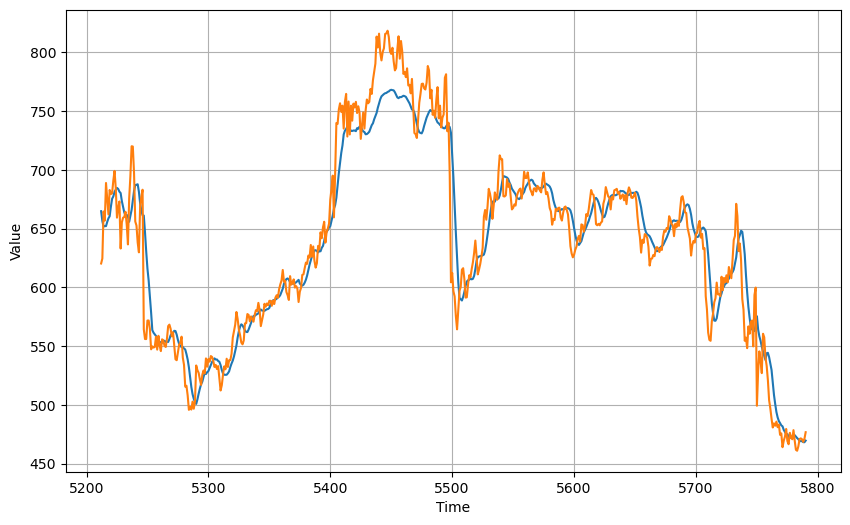

In [80]:
# Plot the results
plot_series(time_valid.index, (results, y_test))

In [81]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(y_test, results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_test, results).numpy())
# higher mse than linear regression

545.3055
16.130384


In [82]:
train_results = model.predict(X_train)
train_results = train_results[:,0]

y_train = y_train.to_numpy()
# y_train = y_train[:,0]


163/163 [==============================] - 1s 7ms/step


In [83]:
print(tf.keras.metrics.mean_squared_error(y_train, train_results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_train, train_results).numpy())

207.37538
9.691518
